# Test for dataset

In [ ]:
from dataset.us_stock_dataset.us_stock_dataset import USStockDataset

In [2]:
dataset = USStockDataset()

In [3]:
dataset.prepare_data('AAPL', '2023-01-01', '2023-10-25')

[*********************100%%**********************]  1 of 1 completed


In [4]:
dataset.train_test_split()
print(dataset.get_train_test_length())

2023-11-02 15:10 INFO Window size is 3
2023-11-02 15:10 INFO Complete the train and test split, the length of them is 200


200


# Test for model

In [5]:
from model.linear_regression.expert import LinearRegressionModel

In [6]:
model = LinearRegressionModel()

# Test for pipeline

In [7]:
from pipeline.value_pipeline.expert import ValuePipeline
pipeline = ValuePipeline(dataset=dataset, model=model)

Train/Evalue process: 100%|██████████| 200/200 [00:00<00:00, 584.56it/s]
2023-11-02 15:10 INFO MSE foe this strategy: 20.81153194020616


[130.14999389648438, 130.72999572753906, 133.49000549316406, 133.41000366210938, 134.75999450683594, 135.94000244140625, 135.2100067138672, 135.27000427246094, 137.8699951171875, 141.11000061035156, 142.52999877929688, 141.86000061035156, 143.9600067138672, 145.92999267578125, 143.0, 144.2899932861328, 145.42999267578125, 150.82000732421875, 154.5, 151.72999572753906, 154.64999389648438, 151.9199981689453, 150.8699951171875, 151.00999450683594, 153.85000610351562, 153.1999969482422, 155.3300018310547, 153.7100067138672, 152.5500030517578, 148.47999572753906, 148.91000366210938, 149.39999389648438, 146.7100067138672, 147.9199981689453, 147.41000366210938, 145.30999755859375, 145.91000366210938, 151.02999877929688, 153.8300018310547, 151.60000610351562, 152.8699951171875, 150.58999633789062, 148.5, 150.47000122070312, 152.58999633789062, 152.99000549316406, 155.85000610351562, 155.0, 157.39999389648438, 159.27999877929688, 157.8300018310547, 158.92999267578125, 160.25, 158.27999877929688

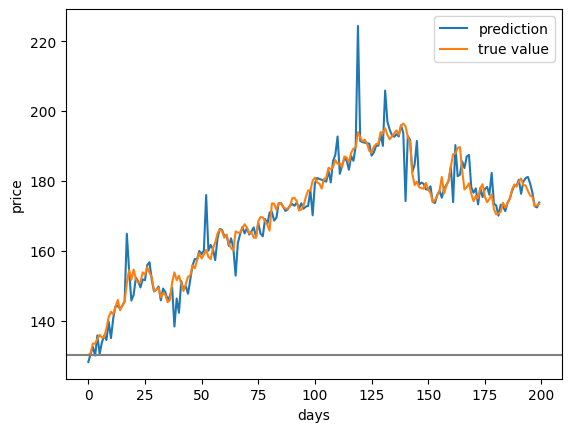

In [8]:
pipeline.run()